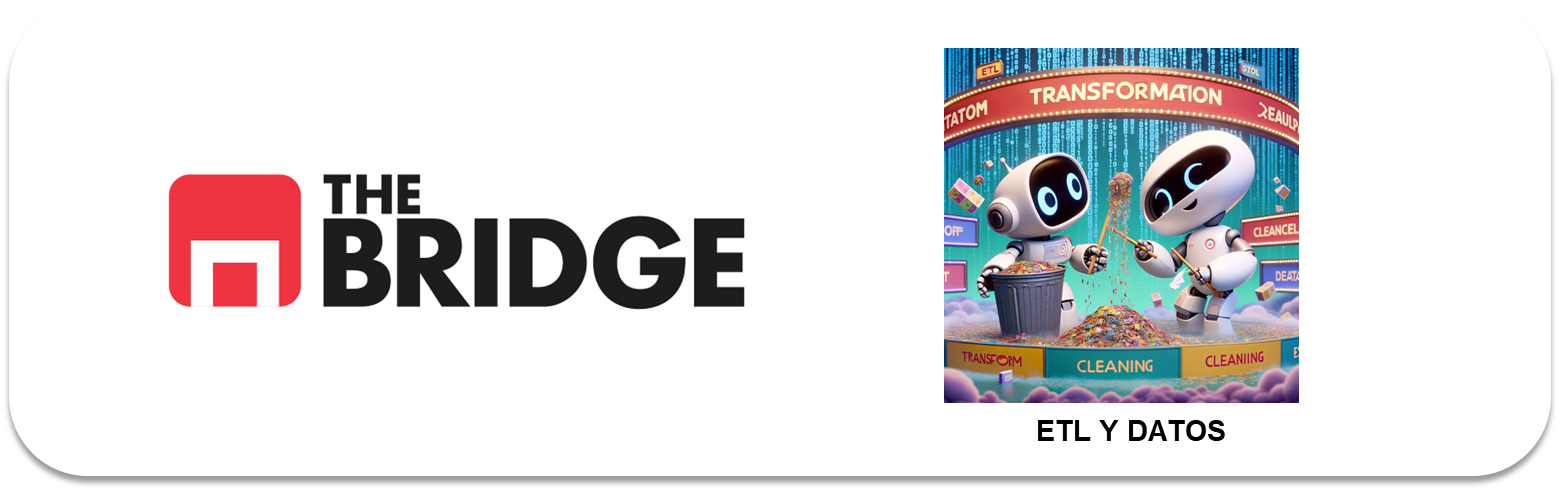

## PRACTICA OBLIGATORIA: Transformación y limpieza

* La práctica obligatoria de esta unidad consiste en cargar un dataset de Netflix y hacer un repaso completo del mismo, limpiando, transformando y creando algunas variables. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

## #0 Carga de datos y primera exploración

In [1]:
import numpy as np
import pandas as pd

df_peliculas = pd.read_csv("data/dataset_netflix_titles.csv")

1. Haz una primera exploración de los datos. Haz una primera visualización de la tabla, muestra la información general, la descripción de las variables numéricas, las columnas y muestra la distribución de datos de tres columnas escogidas por ti.

## #1 Duplicados y cardinalidad

1. ¿Existen filas duplicadas?¿Cuántas?

2. Deshazte de las filas duplicadas, si las hubiera. Quédate con las últimas copias.

3. Ahora que no hay duplicados, tiene sentido calcular la cardinalidad de cada columna. Haz un programa que la obtenga y guarde el resultado en un diccionario con claves el nombre de las columnas y valores la cardinalidad (tal y como la hemos visto en el workout) de cada columna. [Nota: ¿has tenido en cuenta los valores nulos?]

4. Haz un pequeño programa que recorra el diccionario y nos diga si hay alguna columna que pueda ser un buen índice (cardinalidad = 100%)


Bonus: Haz los ejercicios 3 y 4 pero usando un objeto `Series` en vez de un diccionario.

## #2 Limpieza y transformación (I)

El primer paso en la limpieza es intentar detectar que campos están "sucios", una posible guía podría ser, encontrar:  
* Campos numéricos inconsistentes (el típico campo con la coma y el punto decimal mezclado, o con formatos numéricos combinados)  
* Campos con valores inconsistentes (por ejemplo aparecen valores que no tienen relación con la columna en la que están porque están mal colocados, porque se han incluido por error, valores medidos en una unidad frente a otros medidos en otra)  
* Campos con valores que son iguales pero están representados de formas diferentes (por ejemplo un actor que unas veces aparece con el nombre en un orden y otras veces con el nombre en otro, o el nombre de un país como USA que aparezca como EEUU otras veces, o cadenas que tienen espacios al principio y al final y Python las considera diferentes: " Clint Eastwood " y "Clint Eastwood").  


Vamos a hacer un pequeño análisis siguiendo las pautas anteriores pero sin profundizar en ellas, en tu EDA sí que tendrás que hacerlo. Para ello nos vamos a centrar en los campos con cardinalidad menor que un 10% (el resto requiere un análsis mucho más exahustivo que se nos va fuera del alcance de la práctica, pero, repito en tu EDA tendrás que hacerlo)

1. Antes de centrarnos en esos campos, quita los espacios en blanco que pueda haber antes o después de cada valor string. (utiliza el método de cadenas de pandas, `strip`). Por ejemplo (como guía pero no como única solución) recorre con un for el nombre de las columnas y ve aplicando el método columna a columna. Pero puedes hacerlo como tú quieras, claro.

Bonus: ¿Se te ocurre alguna forma rápida, que no necesariamente completa, de ver si ha afectado en algo esta operación?

2. Lista los campos con cardinalidad menor a 10%

3. Para los campos que hayas obtenido, muestra su distribución de valores, sus valores únicos y determina si crees que se puede o debe hacer alguna acción de limpieza o transformación directa. No le des muchas vueltas.

4. Limpia o simplifica/transforma dos de los campos detectados en 3, si hay al menos dos, si no, uno. Para ello puedes:  
4.1 Cualquier agrupa los valores de los campos tipo categoría con categorías similares que se llamen distinto.  
4.2 Quita valores extraños o que no correspondan. Conviertelos a "", y luego busca un valor para sustituirlos.

5. Convierte o cambia el tipo de la columna con fechas en strings a un tipo datetime. La columna que son solo años es mejor dejarla como integer, porque se opera muy fácil así. Tendrás que analizar los argumentos de pd.datetime y jugar con ellos para poder conseguirlo.

## #3 Tratamiento de Missings/Nulos

Es hora de tratar los nulos. Así que habrá que identificarlos para empezar.

1. Haz una lista con las columnas que contienen valores nulos. Obtenla a "mano" mirando la salid del método info o bien haz un programa que las obtenga de forma automática.

2. Obten el porcentaje de valores nulos para cada una de las columnas.

3. Corrige de la mejor manera que se te ocurra las dos columnas con menor porcentajes de nulos.

4. En un caso como este, que no hay apenas valores numéricos y las columnas con nulos no son categóricas, es mejor o deshacerse de los nulos o bien simplemente marcarlos pero convertidos a un valor más manejable y del tipo del resto de valores de la columna en la que aparecen. Por eso cambia los nulos en las columnas que no hayas tratado en el apartado anterior por "UNK" o por "".

5. Comprueba ahora que no hemos generado duplicados, si existiesen borralos y quedate la primera ocurrencia.

## #4 Generación de nuevos datos

Para terminar de hacer nuestro procesado, intentemos enriquecer el dataset y obtener alguna información adicional.

1. Separa el dataset en dos dataframes,uno de películas y otro de series. A veces aunque los datos parecen de la misma naturaleza, puede ser bueno separarlos para trabajar con ellos de forma independiente.

2. Ahora además podemos sacarle más provecho a algunos campos, por ejemplo duration. Muestra la distribución de valores para cada dataframe del campo "duration".

3. Convierte los valores de "duration" en cada dataframe a valores numéricos y cambia en el de las series el nombre por uno más representativo. Se valorará el emplear una expresión regular para obtener la información.

4. BONUS: Crea un campo "Posible_Secuela" en el dataset de películas con valor a False por defecto. Intenta (con expresiones regulares si es posible) hacer una función que aplicada (con apply) a un título determine si es una posible secuela o no. Emplea la función (con apply) para rellenar el campo "Posible_Secuela". Nota: No hace falta que sea infalible,ni que las cace todas sino que tenga una lógica defendible, piensa en la forma que normalmente tienen las secuelas, por ejemplo la de Terminator.m..